In [3]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np



import warnings
# remove all warnings
warnings.filterwarnings("ignore")




# Load the dataset
df1 = pd.read_csv('dataset.csv')
df = df1.drop(['customer_id'], axis=1)


# Handling missing values
#imputer = SimpleImputer(strategy='mean')
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# replace % and ? with null in the country column 
df['country'].replace(['?', '%'], pd.NA, inplace=True)

# Drop rows with missing
print(df.isna().sum())
df.dropna(inplace=True)




#one-hot encoding 
categorical_columns = ['country', 'gender']
df = pd.get_dummies(df, columns=categorical_columns)

display(df)

# Separate features and target  
X = df.drop('churn (Churn Status)', axis=1) 
y = df['churn (Churn Status)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


credit_score                                                           0
country                                                               17
gender                                                                 0
age                                                                    0
tenure (From how many years he/she is having bank acc in ABC Bank)     0
Account balance                                                        2
products_number (Number of Product from bank)                          0
credit_card (Is this customer have credit card ?)                      0
active_member (Is he/she is active Member of bank ?)                   0
estimated_salary                                                       3
churn (Churn Status)                                                   0
dtype: int64


,credit_score,age,tenure (From how many years he/she is having bank acc in ABC Bank),Account balance,products_number (Number of Product from bank),credit_card (Is this customer have credit card ?),active_member (Is he/she is active Member of bank ?),estimated_salary,churn (Churn Status),country_France,country_Germany,country_Spain,gender_Female,gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,764,38,4,113607.47,1,1,0,91094.46,0,0,0,1,0,1
10002,678,41,2,148088.11,1,1,0,14083.12,0,1,0,0,0,1
10003,751,48,4,0.00,1,0,1,30165.06,1,1,0,0,1,0
10004,670,33,8,126679.69,1,1,1,39451.09,0,1,0,0,0,1


#### under sampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)

### without weight tunning

In [39]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB



# Define individual models with best hyperparameters
knn = KNeighborsClassifier(n_neighbors=4, metric='chebyshev')
naive_bayes = ComplementNB(alpha= 0.1, class_prior= None, fit_prior= True)
SVM = SVC(C= 1, gamma= 'scale', kernel= 'rbf')
#DNN = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, activation='relu', solver='adam', alpha=best_alpha, max_iter=best_max_iter)
logistic_regression = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'lbfgs')
#decision_tree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
random_forest = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=10)
dt = DecisionTreeClassifier() 
adaboosting = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)

# Define individual models
# Define individual models
models = [
    ('knn', knn),
    ('naive_bayes', naive_bayes),
    ('SVM', SVM),
    ('logistic_regression', logistic_regression),
    ('random_forest', random_forest),
    ('adaboosting', adaboosting)
]


# Voting Classifier with weighted models
voting_classifier = VotingClassifier(estimators=models, voting='hard', weights=[2, 1, 1, 1, 1, 1])

voting_classifier.fit(X_res, y_res)
voting_predictions = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print("Voting Classifier Accuracy:", voting_accuracy)



Voting Classifier Accuracy: 0.658487731597396


#### weight tunning

In [35]:
from sklearn.model_selection import GridSearchCV


param_grid = {'weights': [
    [2, 2, 1, 1, 1, 1],
    [2, 1, 1, 1, 1, 1],
    [2, 1, 2, 1, 1, 1],
    [2, 1, 1, 2, 1, 1],
    [2, 1, 1, 1, 2, 1],
   
]}

# Create the VotingClassifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')

# Instantiate GridSearchCV
grid_search = GridSearchCV(voting_classifier, param_grid, cv=5, scoring='recall', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_weights = grid_search.best_params_['weights']
best_recall = grid_search.best_score_

print("Best weights:", best_weights)
print("Best recall:", best_recall)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best weights: [2, 1, 1, 1, 1, 1]
Best recall: 0.043459031209737896


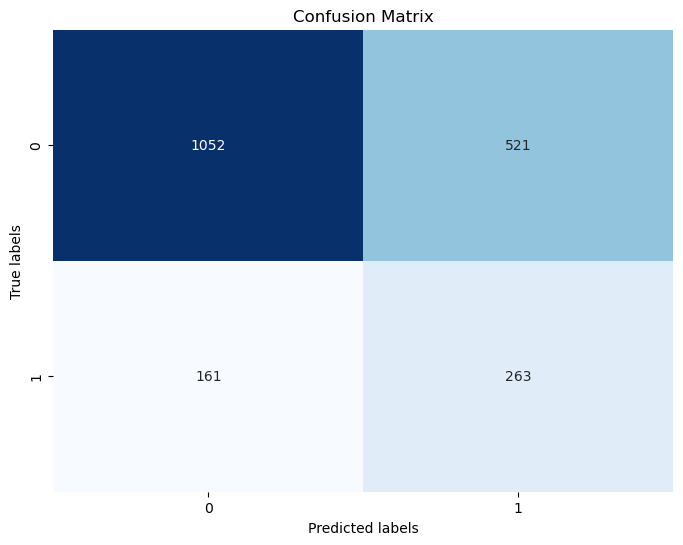

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1573
           1       0.34      0.62      0.44       424

    accuracy                           0.66      1997
   macro avg       0.60      0.64      0.60      1997
weighted avg       0.75      0.66      0.69      1997



In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, voting_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
print("Classification Report:")
print(classification_report(y_test, voting_predictions))

### Stacking

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=4, metric='chebyshev')
naive_bayes = ComplementNB(alpha= 0.1, class_prior= None, fit_prior= True)
SVM = SVC(C= 1, gamma= 'scale', kernel= 'rbf')
#DNN = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, activation='relu', solver='adam', alpha=best_alpha, max_iter=best_max_iter)
logistic_regression = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'lbfgs')
#decision_tree = DecisionTreeClassifier(max_depth=None, min_samples_split=3)
random_forest = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=10)
dt = DecisionTreeClassifier() 
adaboosting = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)

# Define stacking classifier
base_models = [
    ('knn', knn),
    ('naive_bayes', naive_bayes),
    ('SVM', SVM),
   # ('DNN', DNN),
    ('logistic_regression', logistic_regression),
   # ('decision_tree', decision_tree),
    ('random_forest', random_forest),
     ('adaboosting', adaboosting)
]

meta_model = SVC()  # Define meta-model

stacking_classifier = StackingClassifier(estimators=base_models,
                                         final_estimator=meta_model,
                                         cv=5)  #  meta-model training


stacking_classifier.fit(X_res, y_res)
predictions = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Stacking Classifier Accuracy:", accuracy)


Stacking Classifier Accuracy: 0.7981972959439159


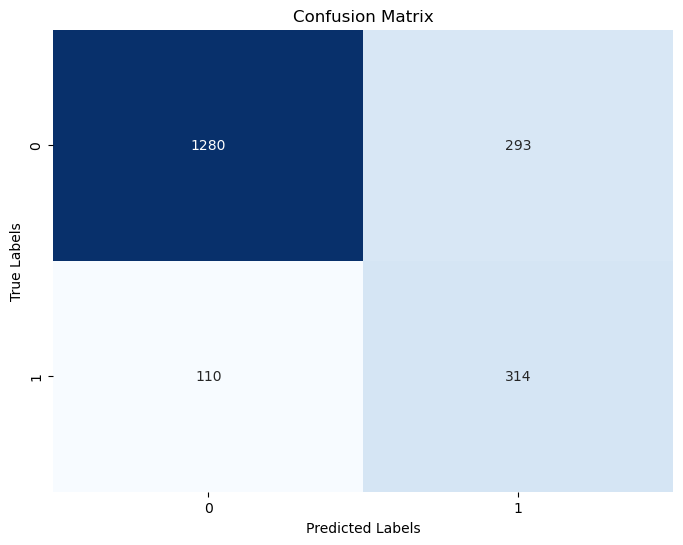

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1573
           1       0.52      0.74      0.61       424

    accuracy                           0.80      1997
   macro avg       0.72      0.78      0.74      1997
weighted avg       0.84      0.80      0.81      1997



In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

#  confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print("Classification Report:")
print(classification_report(y_test, predictions))
